##Data Preprocessing

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [68]:
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')

In [69]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [70]:
df_train.shape
    

(891, 12)

In [71]:
#There are 891 rows and 12 columns 

In [72]:
#Creating a function to plot graphs of vrious features
def graph(s):
  sur=df_train[df_train['Survived'] == 1][s].value_counts()
  dead=df_train[df_train['Survived'] == 0][s].value_counts()

  df=pd.DataFrame([sur , dead])
  df.plot(kind='bar')
  print(df.head())

In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [75]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [76]:
#There are significant umber of null values in the Age and Cabin Column

In [77]:
#Filling the null values of Age Column
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

In [78]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [79]:
#All the null values in Age column have been replaced

In [80]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
#We are dropping the columns which do not have any relation with our target column 'survived' 
l1=['PassengerId','Ticket']

In [82]:
df_train.drop(l1,axis=1,inplace=True)
df_test.drop(l1,axis=1,inplace=True)


In [83]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [84]:
resultant_title = [df_train, df_test]
for data in resultant_title :

    data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.',expand = False)

In [85]:
#Title : Mr., Miss , Mrs,
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Lady          1
Mme           1
Jonkheer      1
Sir           1
Ms            1
Countess      1
Capt          1
Name: Title, dtype: int64

In [86]:
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [87]:
#Mapping the title column.Encorporting all the low frequency titles under a single category
mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in resultant_title:
    dataset['Title'] = dataset['Title'].map(mapping)


         0    1   2   3
Title   81  127  99  35
Title  436   55  26  32


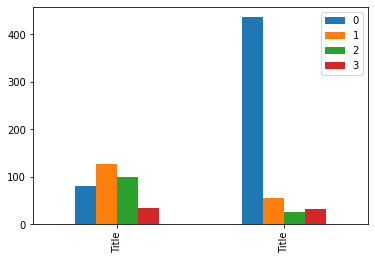

In [88]:
graph('Title')

In [89]:
#Filling the Null values with the median of the associated title
df_train["Age"].fillna(df_train.groupby("Title")["Age"].transform("median"),inplace = True)
df_test["Age"].fillna(df_test.groupby("Title")["Age"].transform("median"),inplace = True)

In [90]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [91]:
#Dropping the Name column since the part necessary for analysis is made into separate Title column
df_train.drop('Name',axis =1,inplace=True)
df_test.drop('Name',axis =1,inplace=True)

In [92]:
Sex_map ={"male" : 0,"female" :1}
for data in resultant_title:
    data['Sex'] = data['Sex'].map(Sex_map)

       0    1
Sex  109  233
Sex  468   81


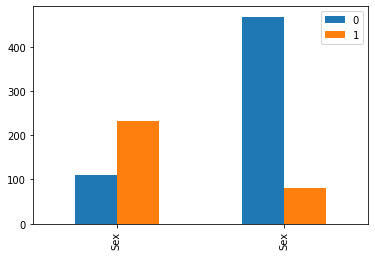

In [93]:
graph('Sex')
#First pair of graphs is for the survived and second pair of graphs is for the dead

In [94]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [95]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

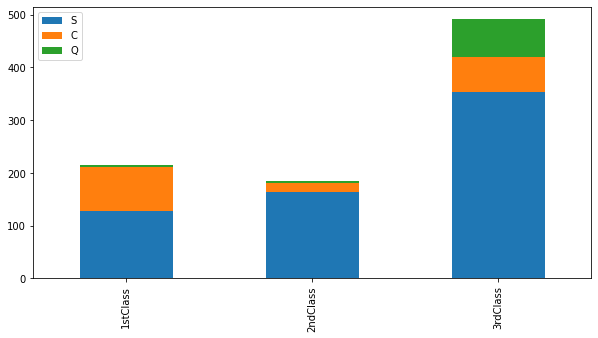

In [96]:

Pclass1 = df_train[df_train['Pclass'] ==1]['Embarked'].value_counts()
Pclass2 = df_train[df_train['Pclass'] ==2]['Embarked'].value_counts()
Pclass3 = df_train[df_train['Pclass'] ==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1stClass','2ndClass','3rdClass']
df.plot(kind ='bar',stacked=True,figsize =(10,5))

In [97]:
#Filling the null values with 'S' class 
for data in resultant_title:
    data['Embarked'] = data['Embarked'].fillna('S')

In [98]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
Title         0
dtype: int64

In [99]:
embarked_map ={"S": 0,"C": 1,"Q": 2}
for data in resultant_title:
    data['Embarked']= data['Embarked'].map(embarked_map)

            0   1   2
Embarked  219  93  30
Embarked  427  75  47


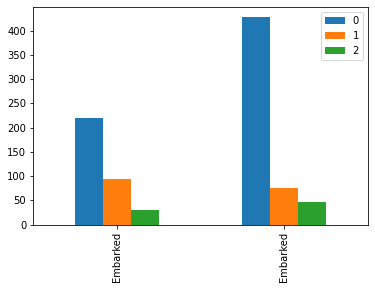

In [100]:
graph('Embarked')

In [101]:
df_train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
F2             3
              ..
D56            1
D6             1
C118           1
E34            1
D10 D12        1
Name: Cabin, Length: 147, dtype: int64

In [102]:
for data in resultant_title:
    data['Cabin'] = data['Cabin'].str[:1]

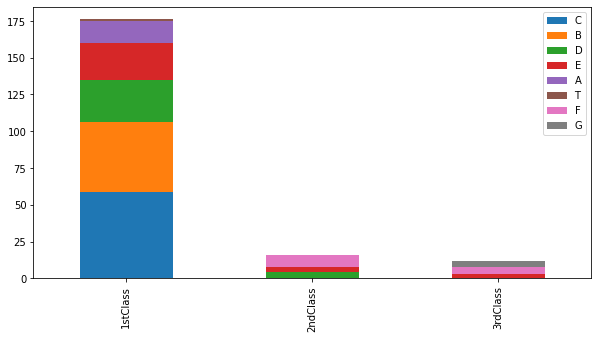

In [103]:
Pclass1 = df_train[df_train['Pclass'] ==1]['Cabin'].value_counts()
Pclass2 = df_train[df_train['Pclass'] ==2]['Cabin'].value_counts()
Pclass3 = df_train[df_train['Pclass'] ==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1stClass','2ndClass','3rdClass']
df.plot(kind ='bar',stacked=True,figsize =(10,5))


In [104]:
#Mapping the classes of cabin
cabin_map = {"A" : 0,"B" : 1,"C" : 2,"D" : 3,"E" : 4,"F" : 5,"G": 6,"T" : 7}
for data in resultant_title:
    data["Cabin"] = data["Cabin"].map(cabin_map)

In [105]:
df_train["Cabin"].fillna(df_train.groupby("Pclass")["Cabin"].transform("median"),inplace =True)
df_test["Cabin"].fillna(df_train.groupby("Pclass")["Cabin"].transform("median"),inplace =True)

In [106]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Title       0
dtype: int64

In [107]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Cabin       0
Embarked    0
Title       0
dtype: int64

##Data is cleaned

In [108]:
print(df_train.shape)

(891, 10)


In [109]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,5.0,0,0
1,1,1,1,38.0,1,0,71.2833,2.0,1,2
2,1,3,1,26.0,0,0,7.9250,5.0,0,1
3,1,1,1,35.0,1,0,53.1000,2.0,0,2
4,0,3,0,35.0,0,0,8.0500,5.0,0,0


In [110]:
l2=['Parch','SibSp']
df_train.drop(l2,axis=1,inplace=True)
df_test.drop(l2,axis=1,inplace=True)


#Label Encoding
Conversion from string to label.
This function assigns a numeric label on its own to the values in he given feature

In [111]:
from sklearn.preprocessing import LabelEncoder
le_S=LabelEncoder()
le_E=LabelEncoder()

In [112]:
df_train['Sex']=le_S.fit_transform(df_train['Sex'])
df_train['Embarked']=le_E.fit_transform(df_train['Embarked'])


In [113]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,7.2500,5.0,0,0
1,1,1,1,38.0,71.2833,2.0,1,2
2,1,3,1,26.0,7.9250,5.0,0,1
3,1,1,1,35.0,53.1000,2.0,0,2
4,0,3,0,35.0,8.0500,5.0,0,0


In [114]:
df_test['Sex']=le_S.transform(df_test['Sex'])
df_test['Embarked']=le_E.transform(df_test['Embarked'])


In [115]:
df_test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title
0,3,0,34.5,7.8292,5.0,2,0
1,3,1,47.0,7.0000,2.0,0,2
2,2,0,62.0,9.6875,5.0,2,0
3,3,0,27.0,8.6625,2.0,0,0
4,3,1,22.0,12.2875,5.0,0,2


In [116]:
le_S.classes_


array([0, 1])

In [117]:
le_E.classes_

array([0, 1, 2])

In [118]:
X_train=df_train.iloc[ : , 1 : ].values
Y_train=df_train.iloc[: , 0].values
X_test=df_test.values

In [119]:
X_train.shape, Y_train.shape, type(X_train)

((891, 7), (891,), numpy.ndarray)

In [120]:
X_train[:10 , :]

array([[ 3.        ,  0.        , 22.        ,  7.25      ,  5.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        , 38.        , 71.2833    ,  2.        ,
         1.        ,  2.        ],
       [ 3.        ,  1.        , 26.        ,  7.925     ,  5.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.        , 35.        , 53.1       ,  2.        ,
         0.        ,  2.        ],
       [ 3.        ,  0.        , 35.        ,  8.05      ,  5.        ,
         0.        ,  0.        ],
       [ 3.        ,  0.        , 29.69911765,  8.4583    ,  5.        ,
         2.        ,  0.        ],
       [ 1.        ,  0.        , 54.        , 51.8625    ,  4.        ,
         0.        ,  0.        ],
       [ 3.        ,  0.        ,  2.        , 21.075     ,  5.        ,
         0.        ,  3.        ],
       [ 3.        ,  1.        , 27.        , 11.1333    ,  5.        ,
         0.        ,  2.        ],
       [ 2.        ,  1.    

In [121]:
# Standard Scaler standardizes the feature and scales all the values between -1 and 1 ie mean 0
from sklearn.preprocessing import StandardScaler
scale_x=StandardScaler()
X_train=scale_x.fit_transform(X_train)
X_test=scale_x.fit_transform(X_test)

In [122]:
X_train[:10 , :]

array([[ 0.82737724, -0.73769513, -0.5924806 , -0.50244517,  0.61184462,
        -0.56883712, -0.73374551],
       [-1.56610693,  1.35557354,  0.63878901,  0.78684529, -1.61024869,
         1.00518113,  1.33186981],
       [ 0.82737724,  1.35557354, -0.2846632 , -0.48885426,  0.61184462,
        -0.56883712,  0.29906215],
       [-1.56610693,  1.35557354,  0.40792596,  0.42073024, -1.61024869,
        -0.56883712,  1.33186981],
       [ 0.82737724, -0.73769513,  0.40792596, -0.48633742,  0.61184462,
        -0.56883712, -0.73374551],
       [ 0.82737724, -0.73769513,  0.        , -0.47811643,  0.61184462,
         2.57919938, -0.73374551],
       [-1.56610693, -0.73769513,  1.87005862,  0.39581356, -0.12885315,
        -0.56883712, -0.73374551],
       [ 0.82737724, -0.73769513, -2.13156761, -0.22408312,  0.61184462,
        -0.56883712,  2.36467747],
       [ 0.82737724,  1.35557354, -0.20770885, -0.42425614,  0.61184462,
        -0.56883712,  1.33186981],
       [-0.36936484,  1.3555

##Model Fitting


In [123]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [124]:
pred=clf.predict(X_train)

In [125]:
print((pred==Y_train).sum())

784


In [126]:
(pred==Y_train).sum()/pred.shape

array([0.87991021])